In [2]:
# Plot Roary outputs in R

# Take the output files from the pan genome pipeline and create nice plots.
library(ggplot2)

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

Saving 6.67 x 6.67 in image


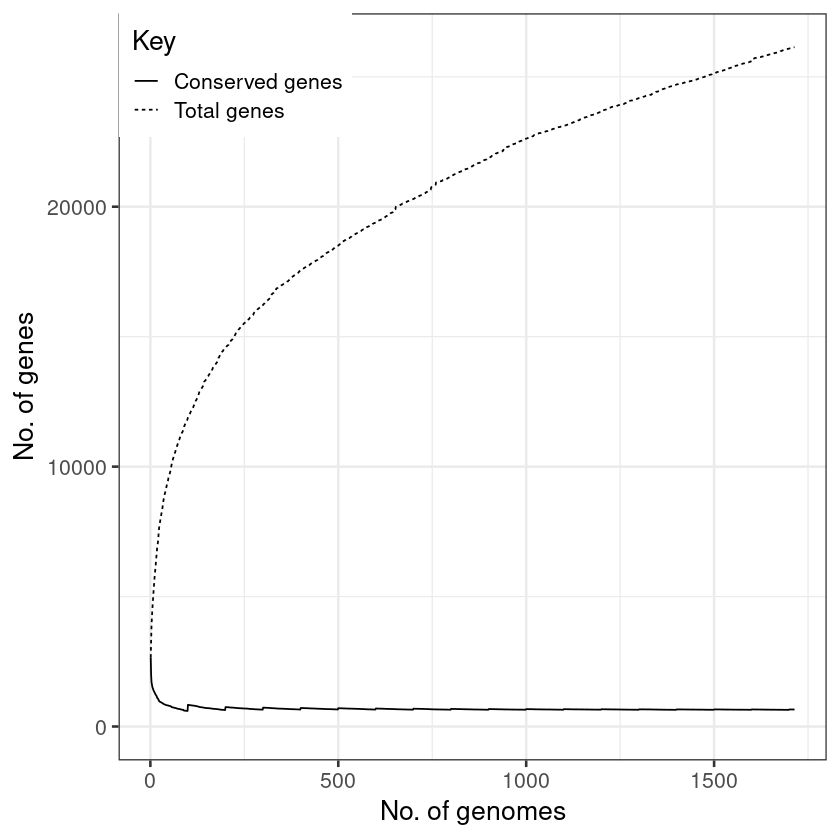

In [3]:
mydata = read.table("data/number_of_new_genes.Rtab")
png(filename = "number_new_genes.png", width = 6, height = 4, units = "in", res = 300)
boxplot(mydata, data=mydata, main="Number of new genes",
         xlab="No. of genomes", ylab="No. of genes",varwidth=TRUE, ylim=c(0,max(mydata)), outline=FALSE)
dev.off()

mydata = read.table("data/number_of_conserved_genes.Rtab")
png(filename = "number_of_conserved_genes.png", width = 6, height = 4, units = "in", res = 300)
boxplot(mydata, data=mydata, main="Number of conserved genes",
          xlab="No. of genomes", ylab="No. of genes",varwidth=TRUE, ylim=c(0,max(mydata)), outline=FALSE)
dev.off()
    
mydata = read.table("data/number_of_genes_in_pan_genome.Rtab")
png(filename = "number_of_genes_in_pan.png", width = 6, height = 4, units = "in", res = 300)
boxplot(mydata, data=mydata, main="No. of genes in the pan-genome",
          xlab="No. of genomes", ylab="No. of genes",varwidth=TRUE, ylim=c(0,max(mydata)), outline=FALSE)
dev.off()

mydata = read.table("data/number_of_unique_genes.Rtab")
png(filename = "number_of_unique_genes.png", width = 6, height = 4, units = "in", res = 300)
boxplot(mydata, data=mydata, main="Number of unique genes",
         xlab="No. of genomes", ylab="No. of genes",varwidth=TRUE, ylim=c(0,max(mydata)), outline=FALSE)
dev.off()

mydata = read.table("data/blast_identity_frequency.Rtab")
png(filename = "blast_identify_frequency.png", width = 6, height = 4, units = "in", res = 300)
plot(mydata,main="Number of blastp hits with different percentage identity",  xlab="Blast percentage identity", ylab="No. blast results")
dev.off()

conserved = colMeans(read.table("data/number_of_conserved_genes.Rtab"))
total = colMeans(read.table("data/number_of_genes_in_pan_genome.Rtab"))

genes = data.frame( genes_to_genomes = c(conserved,total),
                    genomes = c(c(1:length(conserved)),c(1:length(conserved))),
                    Key = c(rep("Conserved genes",length(conserved)), rep("Total genes",length(total))) )
                    
ggplot(data = genes, aes(x = genomes, y = genes_to_genomes, group = Key, linetype=Key)) +geom_line()+
theme_classic() +
ylim(c(1,max(total)))+
xlim(c(1,length(total)))+
xlab("No. of genomes") +
ylab("No. of genes")+ theme_bw(base_size = 16) +  theme(legend.justification=c(0,1),legend.position=c(0,1))
ggsave(filename="conserved_vs_total_genes.png", scale=1)

Saving 6.67 x 6.67 in image


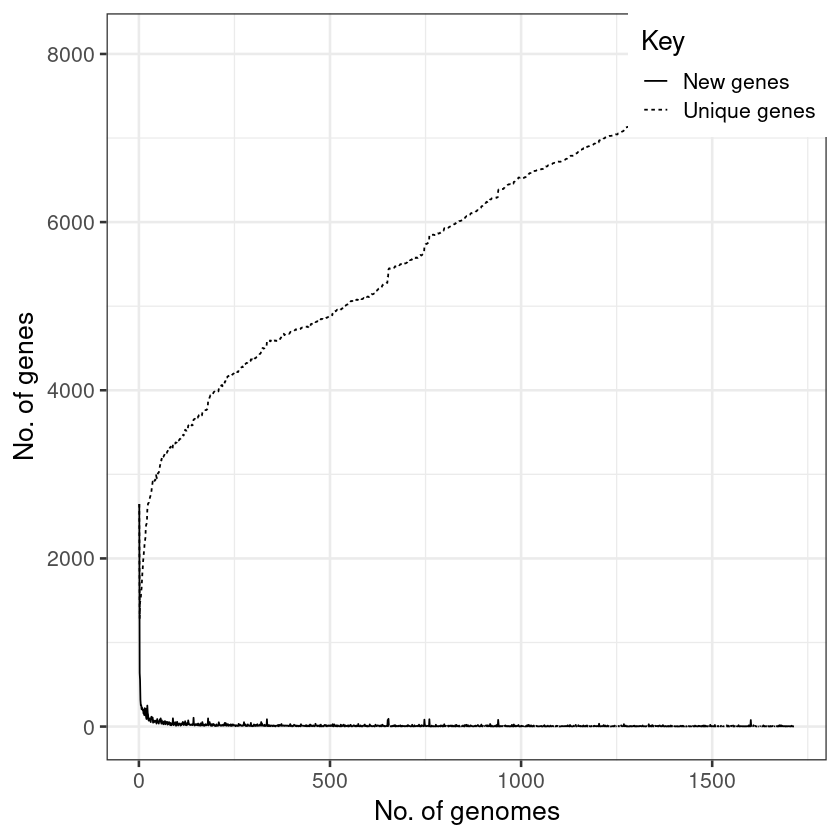

In [5]:
unique_genes = colMeans(read.table("data/number_of_unique_genes.Rtab"))
new_genes = colMeans(read.table("data/number_of_new_genes.Rtab"))

genes = data.frame( genes_to_genomes = c(unique_genes,new_genes),
                    genomes = c(c(1:length(unique_genes)),c(1:length(unique_genes))),
                    Key = c(rep("Unique genes",length(unique_genes)), rep("New genes",length(new_genes))) )
                    
ggplot(data = genes, aes(x = genomes, y = genes_to_genomes, group = Key, linetype=Key)) +geom_line()+
theme_classic() +
ylim(c(1,max(unique_genes)))+
xlim(c(1,length(unique_genes)))+
xlab("No. of genomes") +
ylab("No. of genes")+ theme_bw(base_size = 16) +  theme(legend.justification=c(1,1),legend.position=c(1,1))
ggsave(filename="unique_vs_new_genes.png", scale=1)